# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
cities

Number of cities in the list: 620


['huarmey',
 'atuona',
 'upernavik',
 'bluff',
 'sesheke',
 'alice springs',
 'manado',
 'bambous virieux',
 'san francisco',
 'pilar',
 'bredasdorp',
 'santa maria',
 'mys shmidta',
 'chuy',
 'cape town',
 'lorengau',
 'rikitea',
 'half moon bay',
 'bubaque',
 'punta arenas',
 'lavrentiya',
 'guerrero negro',
 'ponta do sol',
 'bur gabo',
 'xixiang',
 'kafue',
 'mbale',
 'tasiilaq',
 'bethel',
 'port alfred',
 'ushuaia',
 'butaritari',
 'wajir',
 'victoria',
 'esperance',
 'hilo',
 'hermanus',
 'ahipara',
 'fort-shevchenko',
 'tabiauea',
 'cayenne',
 'souillac',
 'rogovatoye',
 'padang',
 'new norfolk',
 'bowen',
 'roald',
 'albany',
 'jennings',
 'biak',
 'busselton',
 'comodoro rivadavia',
 'belushya guba',
 'wajid',
 'tiksi',
 'ilulissat',
 'cabo san lucas',
 'avarua',
 'petropavlovsk-kamchatskiy',
 'hobart',
 'dvinskoy',
 'tumannyy',
 'ancud',
 'mahebourg',
 'kavaratti',
 'medicine hat',
 'olafsvik',
 'adrar',
 'castro',
 'lakota',
 'port hedland',
 'dikson',
 'longyearbyen',
 'lu

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | huarmey
Processing Record 2 of Set 1 | atuona
Processing Record 3 of Set 1 | upernavik
Processing Record 4 of Set 1 | bluff
Processing Record 5 of Set 1 | sesheke
Processing Record 6 of Set 1 | alice springs
Processing Record 7 of Set 1 | manado
Processing Record 8 of Set 1 | bambous virieux
Processing Record 9 of Set 1 | san francisco
Processing Record 10 of Set 1 | pilar
Processing Record 11 of Set 1 | bredasdorp
Processing Record 12 of Set 1 | santa maria
Processing Record 13 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 14 of Set 1 | chuy
Processing Record 15 of Set 1 | cape town
Processing Record 16 of Set 1 | lorengau
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | half moon bay
Processing Record 19 of Set 1 | bubaque
Processing Record 20 of Set 1 | punta arenas
Processing Record 21 of Set 1 | lavrentiya
Processing Record 22 of Set 1 | guerrero

Processing Record 35 of Set 4 | nouadhibou
Processing Record 36 of Set 4 | bayan
Processing Record 37 of Set 4 | salalah
Processing Record 38 of Set 4 | klaksvik
Processing Record 39 of Set 4 | vanimo
Processing Record 40 of Set 4 | haflong
Processing Record 41 of Set 4 | yar-sale
Processing Record 42 of Set 4 | san antero
Processing Record 43 of Set 4 | tuktoyaktuk
Processing Record 44 of Set 4 | qeshm
Processing Record 45 of Set 4 | campbell river
Processing Record 46 of Set 4 | batagay-alyta
Processing Record 47 of Set 4 | atasu
Processing Record 48 of Set 4 | ponte de sor
Processing Record 49 of Set 4 | dabakala
Processing Record 0 of Set 5 | ust-maya
Processing Record 1 of Set 5 | saurimo
Processing Record 2 of Set 5 | coihaique
Processing Record 3 of Set 5 | nizhneyansk
City not found. Skipping...
Processing Record 4 of Set 5 | auki
Processing Record 5 of Set 5 | chagoda
Processing Record 6 of Set 5 | vallenar
Processing Record 7 of Set 5 | barrow
Processing Record 8 of Set 5 | h

Processing Record 24 of Set 8 | otjimbingwe
Processing Record 25 of Set 8 | lalomanu
City not found. Skipping...
Processing Record 26 of Set 8 | guarapari
Processing Record 27 of Set 8 | sembe
Processing Record 28 of Set 8 | lata
Processing Record 29 of Set 8 | deniliquin
Processing Record 30 of Set 8 | hay river
Processing Record 31 of Set 8 | poykovskiy
Processing Record 32 of Set 8 | bagli
Processing Record 33 of Set 8 | teahupoo
Processing Record 34 of Set 8 | zaozerne
Processing Record 35 of Set 8 | giyani
Processing Record 36 of Set 8 | aksay
Processing Record 37 of Set 8 | andros town
Processing Record 38 of Set 8 | verkhnevilyuysk
Processing Record 39 of Set 8 | cherskiy
Processing Record 40 of Set 8 | ust-kamchatsk
City not found. Skipping...
Processing Record 41 of Set 8 | nemuro
Processing Record 42 of Set 8 | kosamba
Processing Record 43 of Set 8 | jieshi
Processing Record 44 of Set 8 | tazirkah
City not found. Skipping...
Processing Record 45 of Set 8 | sitka
Processing Re

Processing Record 12 of Set 12 | beloha
Processing Record 13 of Set 12 | cairns
Processing Record 14 of Set 12 | kutum
Processing Record 15 of Set 12 | townsville
Processing Record 16 of Set 12 | birin
Processing Record 17 of Set 12 | vestmannaeyjar
Processing Record 18 of Set 12 | lazaro cardenas
Processing Record 19 of Set 12 | juye
Processing Record 20 of Set 12 | tarko-sale
Processing Record 21 of Set 12 | nago
Processing Record 22 of Set 12 | port lincoln
Processing Record 23 of Set 12 | trairi
Processing Record 24 of Set 12 | fukue
Processing Record 25 of Set 12 | spearfish
Processing Record 26 of Set 12 | joshimath
Processing Record 27 of Set 12 | galle
Processing Record 28 of Set 12 | japura
Processing Record 29 of Set 12 | banda aceh
Processing Record 30 of Set 12 | amapa
Processing Record 31 of Set 12 | njombe
Processing Record 32 of Set 12 | sioux lookout
Processing Record 33 of Set 12 | voi
Processing Record 34 of Set 12 | murgab
Processing Record 35 of Set 12 | lasa
Proces

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [5]:
# Display sample data
city_data_df.head(5)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,huarmey,-10.0681,-78.1522,25.19,77,100,3.71,PE,1679447607
1,atuona,-9.8000,-139.0333,26.71,68,2,5.26,PF,1679447608
2,upernavik,72.7868,-56.1549,-27.56,100,69,1.89,GL,1679447337
3,bluff,-46.6000,168.3333,12.01,60,100,5.65,NZ,1679447609
4,sesheke,-17.4759,24.2968,18.24,91,57,2.03,ZM,1679447610


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,huarmey,-10.0681,-78.1522,25.19,77,100,3.71,PE,1679447607
1,atuona,-9.8000,-139.0333,26.71,68,2,5.26,PF,1679447608
2,upernavik,72.7868,-56.1549,-27.56,100,69,1.89,GL,1679447337
3,bluff,-46.6000,168.3333,12.01,60,100,5.65,NZ,1679447609
4,sesheke,-17.4759,24.2968,18.24,91,57,2.03,ZM,1679447610


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

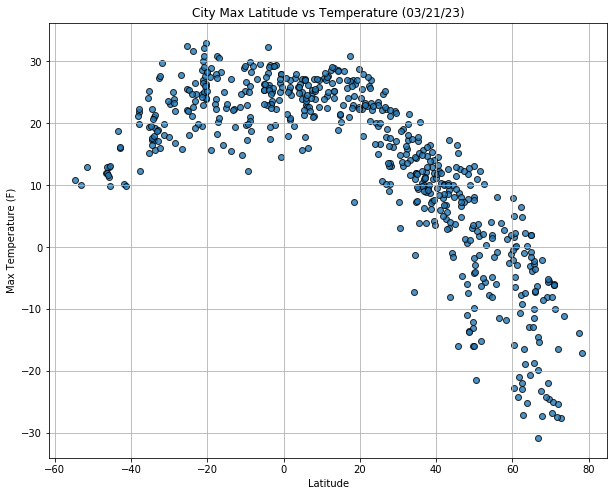

In [8]:
# Build scatter plot for latitude vs. temperature
# Generate the scatter plot
plt.figure(figsize=(10,8))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"],
           edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Max Latitude vs Temperature" + time.strftime(" (%x)"))
plt.grid()

# Save the figure
plt.savefig("../Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

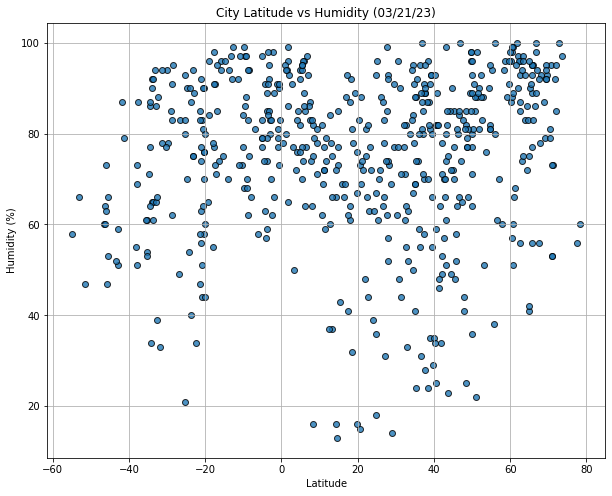

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(10,8))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"],
           edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity" + time.strftime(" (%x)"))
plt.grid()

# Save the figure
plt.savefig("../Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

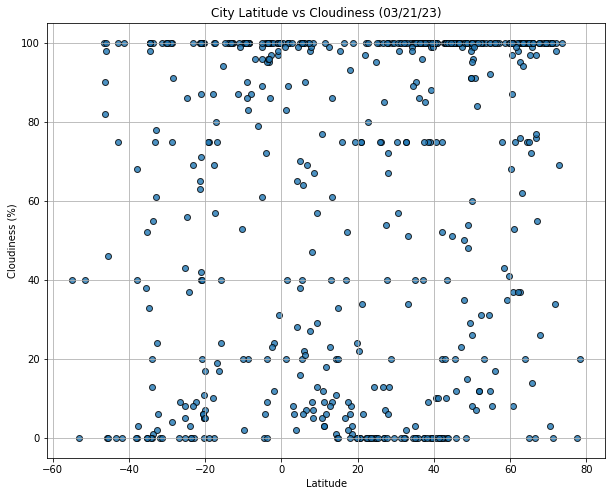

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(10,8))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"],
           edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness" + time.strftime(" (%x)"))
plt.grid()

# Save the figure
plt.savefig("../Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

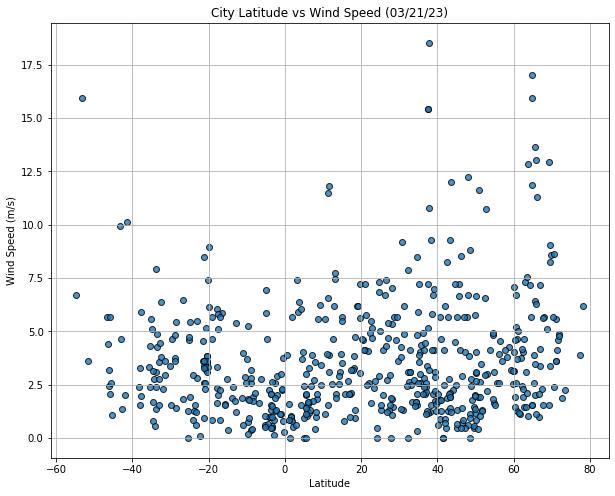

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(10,8))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"],
           edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs Wind Speed" + time.strftime(" (%x)"))
plt.grid()

# Save the figure
plt.savefig("../Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [67]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.figure(figsize=(10,6))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq, coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

In [57]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,upernavik,72.7868,-56.1549,-27.56,100,69,1.89,GL,1679447337
6,manado,1.4870,124.8455,25.43,94,40,1.03,ID,1679447611
8,san francisco,37.7749,-122.4194,9.62,89,100,18.52,US,1679447597
16,half moon bay,37.4636,-122.4286,9.66,91,100,15.43,US,1679447615
17,bubaque,11.2833,-15.8333,24.47,72,3,6.58,GW,1679447616


In [58]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,huarmey,-10.0681,-78.1522,25.19,77,100,3.71,PE,1679447607
1,atuona,-9.8000,-139.0333,26.71,68,2,5.26,PF,1679447608
3,bluff,-46.6000,168.3333,12.01,60,100,5.65,NZ,1679447609
4,sesheke,-17.4759,24.2968,18.24,91,57,2.03,ZM,1679447610
5,alice springs,-23.7000,133.8833,31.75,40,0,1.54,AU,1679447610


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7624364833893955


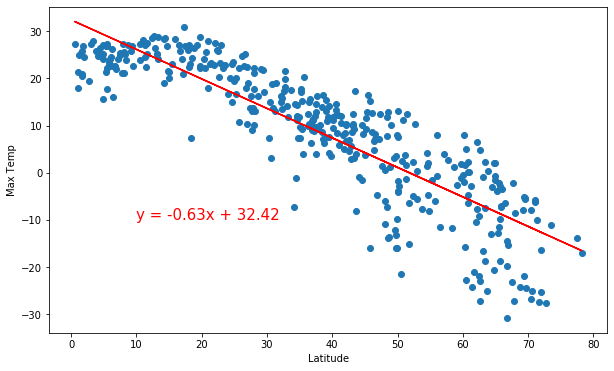

In [69]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (10,-10))
plt.show()

The r-squared is: 0.3154952151880565


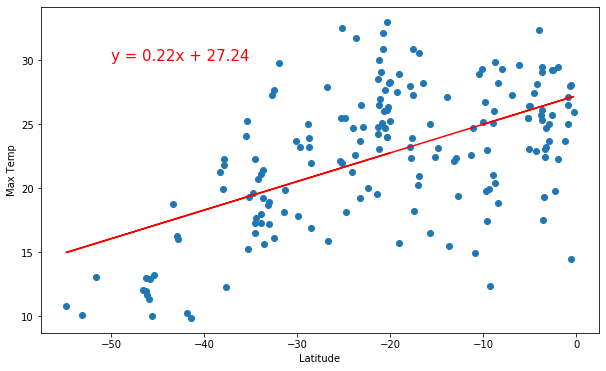

In [71]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (-50,30))
plt.show()

**Discussion about the linear relationship:** Northern Hemisphere: Latitude and Temperature have a strong negative correlation. Southern Hemisphere: Latitude and Temperature have a weak positive correlation.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.02220064821232062


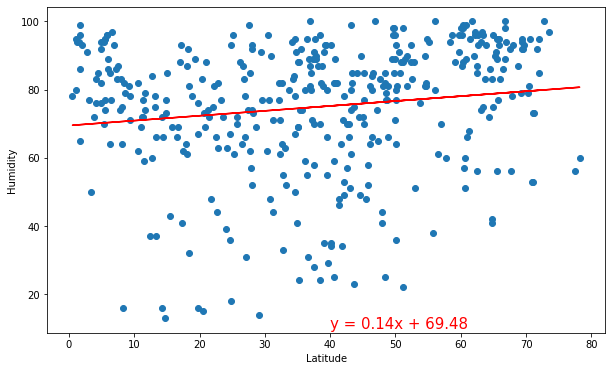

In [72]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (40,10))
plt.show()

The r-squared is: 0.13920532232093943


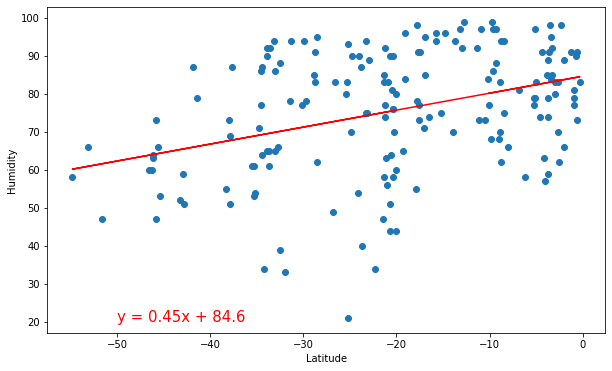

In [73]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (-50,20))
plt.show()

**Discussion about the linear relationship:** Both hemispheres: Latitude and Humidity have a relatively weak positive correlation.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.06976175012113327


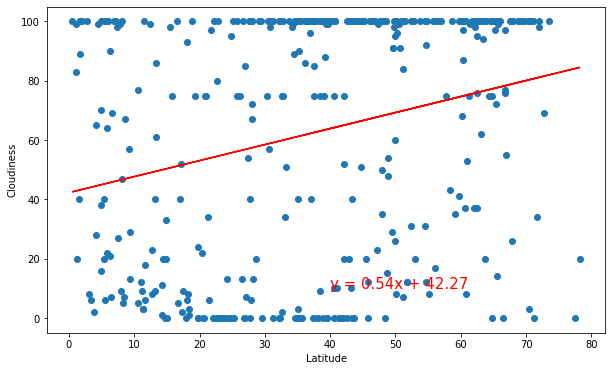

In [74]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (40,10))
plt.show()

The r-squared is: 0.08985633204233734


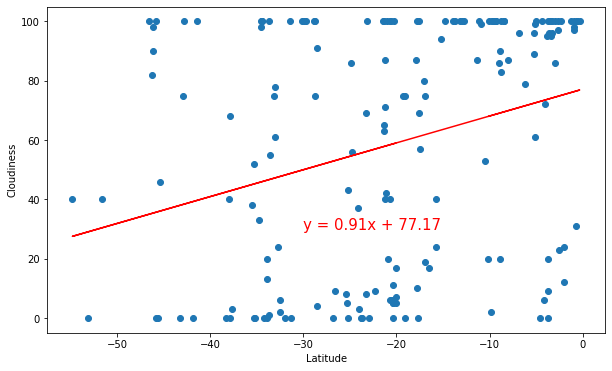

In [75]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (-30,30))
plt.show()

**Discussion about the linear relationship:** Both Hemispheres: Latitude and Cloudiness have a weak positive correlation.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.03038785763596675


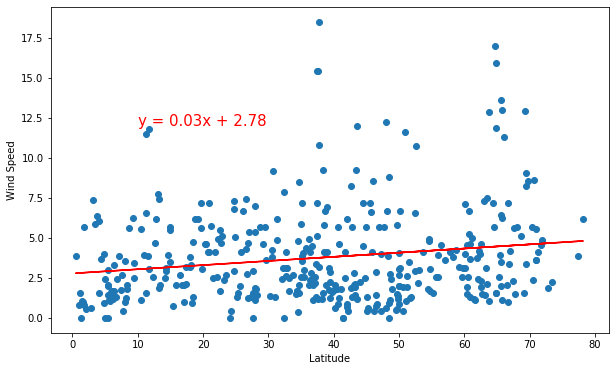

In [76]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (10,12))
plt.show()

The r-squared is: 0.15714426906532133


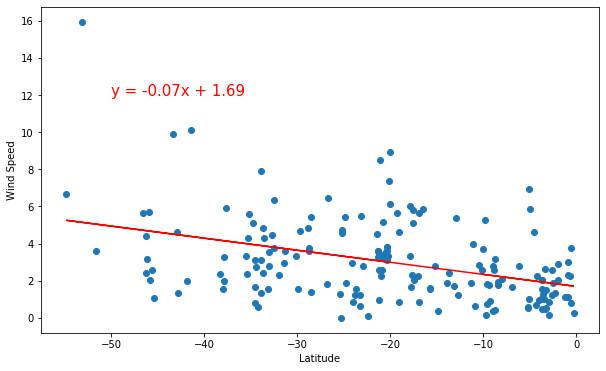

In [77]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (-50,12))
plt.show()

**Discussion about the linear relationship:** Northern Hemisphere: Latitude and Wind Speed have a relatively weak positive correlation. Southern Hemisphere: Latitude and Wind Speed have a relatively weak negative correlation.